## EDA : Exploratory Data Analysis

## <center>**Mental Health Analysis**</center>

## **Table of Contents**

1. [**Problem Statement**](#section1)<br>
2. [**Importing Packages**](#section2)<br>
3. [**Loading Data**](#section3)<br>
4. [**Description of the Dataset**](#section401)<br>
5. [**Data Preprocessing**](#section5)<br>
6. [**Exploratory Data Analysis**](#section6)<br>
7. [**Conclusion**](#section7)<br>

<a id=section2></a>

---
# **2. Importing Libraries**
---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<a id=section3></a>

---
# **3. Loading Data**
---

In [3]:
data = pd.read_csv("mental_health_finaldata_1.csv")
data
test_data = data.copy()

---
# **4. Data Description**
---


In [86]:
data.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


<a id=section5></a>

---
# **5 Data Preprocessing**
---

<a id=section52></a>

---
## **5.2 Data Cleaning**
---

In [89]:
data.duplicated().sum()

np.int64(0)

In [90]:
data.isna().sum()

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64

<a id=section6></a>

---
# **6. Exploratory Data Analysis**
---

In [91]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

#### 1) What is the distribution of Age groups in the dataset :-

<Axes: xlabel='Age', ylabel='count'>

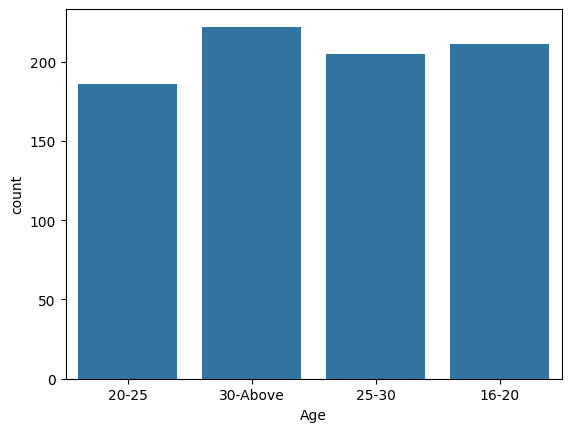

In [8]:
### 1) What is the distribution of Age groups in the dataset :-
sns.countplot(data = test_data, x = "Age")

#### Observations :
- We have 4 growing Age groups in the above Data set => 16-20,20-25, 25-30 and above 30
- We can conclude from the above Dataframe Analysis that the age group with the maximum count is 30 and above
- We can conclude from the above Dataframe Analysis that age group with the least count is between 20-25

#### 2) What is the Gender distribution in the dataset :-

<Axes: xlabel='Gender', ylabel='count'>

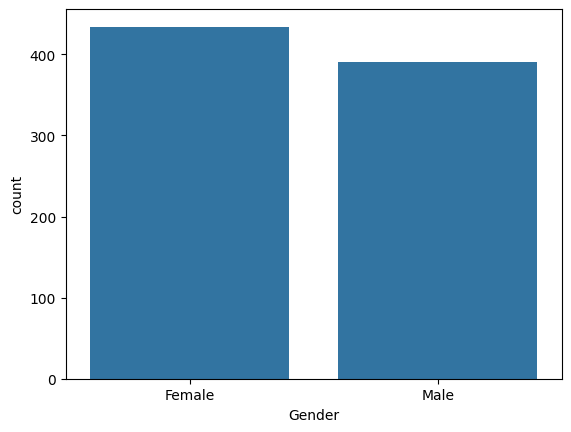

In [9]:
sns.countplot(data = test_data, x = "Gender")

#### Observations :
- There are 2 Gender groups within the Dataset : Male & Female
- We can conclude from the above Dataframe Analysis that the gender with the maximum count is Female which maximises at around 450
- We can conclude from the above Dataframe Analysis that the gender with the minimum count is Male which is around 390

#### 3) What are the most occupations in the dataset :-

In [19]:
test_data
most_common_occupation = test_data["Occupation"].mode().reset_index()
most_common_occupation

,index,Occupation
0,0,Housewife


#### Observations :
- We have 5 Occupations in the above Dataset : Housewife, Student, Corporate, Business, Others
- From the above Dataframe Analysis, we can conclude that the most common occupation is that of a "Housewife"

#### 4) How many days on Average did people spend indoors:-

In [15]:
test_data["Days_Indoors"].value_counts()

Days_Indoors
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: count, dtype: int64

In [23]:
test_data
def process_indoors_day(x):
    if x == "31-60 days":
        return 45
    elif x == "1-14 days":
        return 7
    elif x == "15-30 days":
        return 22
    elif x == "Go out Every day":
        return 0
    else:
        return 75

test_data["Days_indoor_numeric"] = test_data["Days_Indoors"].apply(process_indoors_day)
test_data["Days_indoor_numeric"].mean()       

np.float64(29.484223300970875)

#### Observations : 
- We have a group of 5 days in the above Dataframe : 31-60 days, 1-14 days, 15-30 days, Go out Every day, More than 2 months
- From the above Dataframe Analysis, we can conclude that on Average did people spend about 29.4 days in Quarantine

#### 5) What percentage of respondents reported growing stress before Quarantine:-


In [25]:
test_data
yes_data = test_data.loc[test_data["Growing_Stress"] == "Yes",:].shape[0]
yes_data

301

In [34]:
total_count = test_data.shape[0]
percentage = (yes_data / total_count) * 100
round(percentage, 2)

36.53

#### Observations :
- We have 3 Growing Stress Groups within the dataset => Yes, Maybe, No
- A logic implementation => Yes = 1, Maybe = 0.5, No = 0
- From the above Dataframe Analysis we can conclude that percentage of respondents who reported Growing Stress due to Quarantine is 36.53

#### 6) What percentage of respondents have a history of Mental health issues:-

In [21]:
test_data
yes_data = test_data.loc[test_data["Mental_Health_History"] == "Yes",:].shape[0]
yes_data
total_data = test_data.shape[0]
total_data
reqd_percent = (yes_data / total_data) * 100
round(reqd_percent, 2)

31.31

#### Observations :
- From the above Dataframe Analysis we can conclude that the percentage of respondents who have a health of mental health issues is 31.31 

#### 7) How many Respondents experienced weight changes during Quarantine:-

In [45]:
test_data.loc[test_data["Changes_Habits"] == "Yes",:].shape[0]

305

#### Observations :
- From the above Dataframe Analysis we can conclude that the number Respondents who experienced weight changes during Quarantine is 305

#### 8) What is the distribution  of mood swings among respondents:-

<Axes: xlabel='Mood_Swings', ylabel='count'>

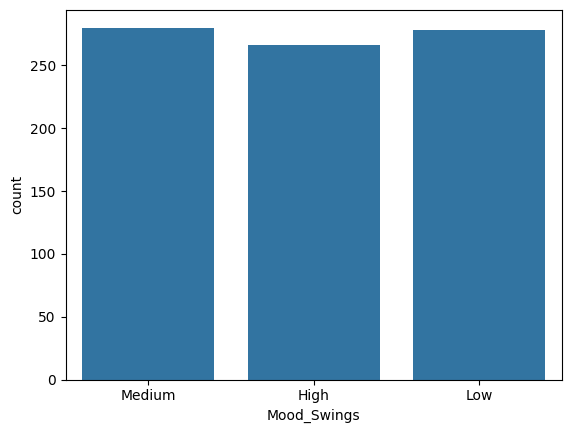

In [57]:
test_data.head()
data1 = test_data.loc[:,["Mood_Swings","Growing_Stress"]]
data1
sns.countplot(data = data1, x = "Mood_Swings")

In [58]:
test_data["Mood_Swings"].value_counts()

Mood_Swings
Medium    280
Low       278
High      266
Name: count, dtype: int64

#### 9) Is there a correlation between growing stress levels and the time spent indoors:-

<Axes: xlabel='Days_Indoors', ylabel='count'>

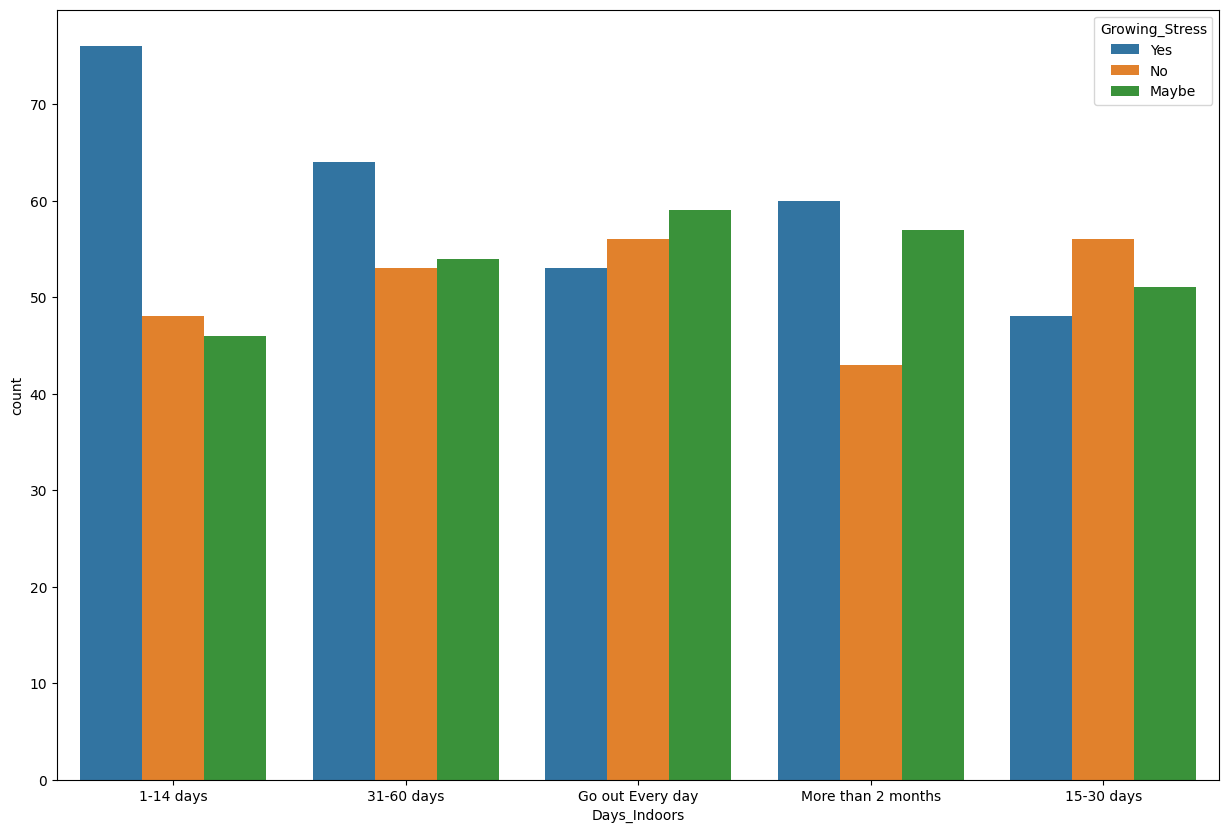

In [65]:
test_data.head()
plt.figure(figsize = (15,10))
sns.countplot(data = test_data, x = "Days_Indoors", hue = "Growing_Stress")

#### 10) Compare the mental health history between males and females. Are there any significant differences?


<Axes: xlabel='Gender', ylabel='count'>

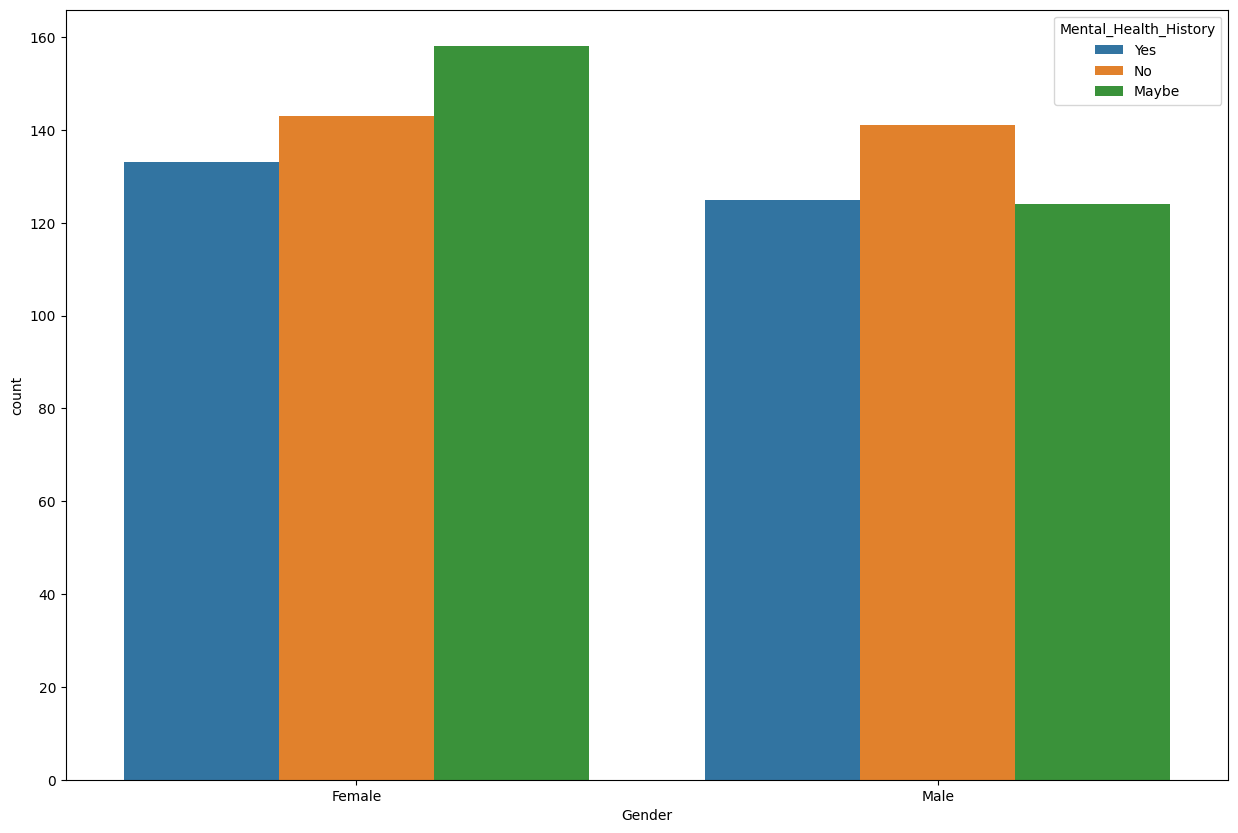

In [68]:
test_data.head()
plt.figure(figsize = (15,10))
sns.countplot(data = data, x = "Gender", hue = "Mental_Health_History")

#### 11) How does the duration of time spent indoors affect quarantine frustrations and changes in habits:-

In [74]:
test_data
df = test_data.groupby(["Days_Indoors","Quarantine_Frustrations","Changes_Habits"]).size().reset_index()
df

,Days_Indoors,Quarantine_Frustrations,Changes_Habits,0
0,1-14 days,Maybe,Maybe,13
1,1-14 days,Maybe,No,16
2,1-14 days,Maybe,Yes,20
3,1-14 days,No,Maybe,21
4,1-14 days,No,No,12
5,1-14 days,No,Yes,20
6,1-14 days,Yes,Maybe,27
7,1-14 days,Yes,No,16
8,1-14 days,Yes,Yes,25
9,15-30 days,Maybe,Maybe,13


<Axes: xlabel='Days_Indoors', ylabel='0'>

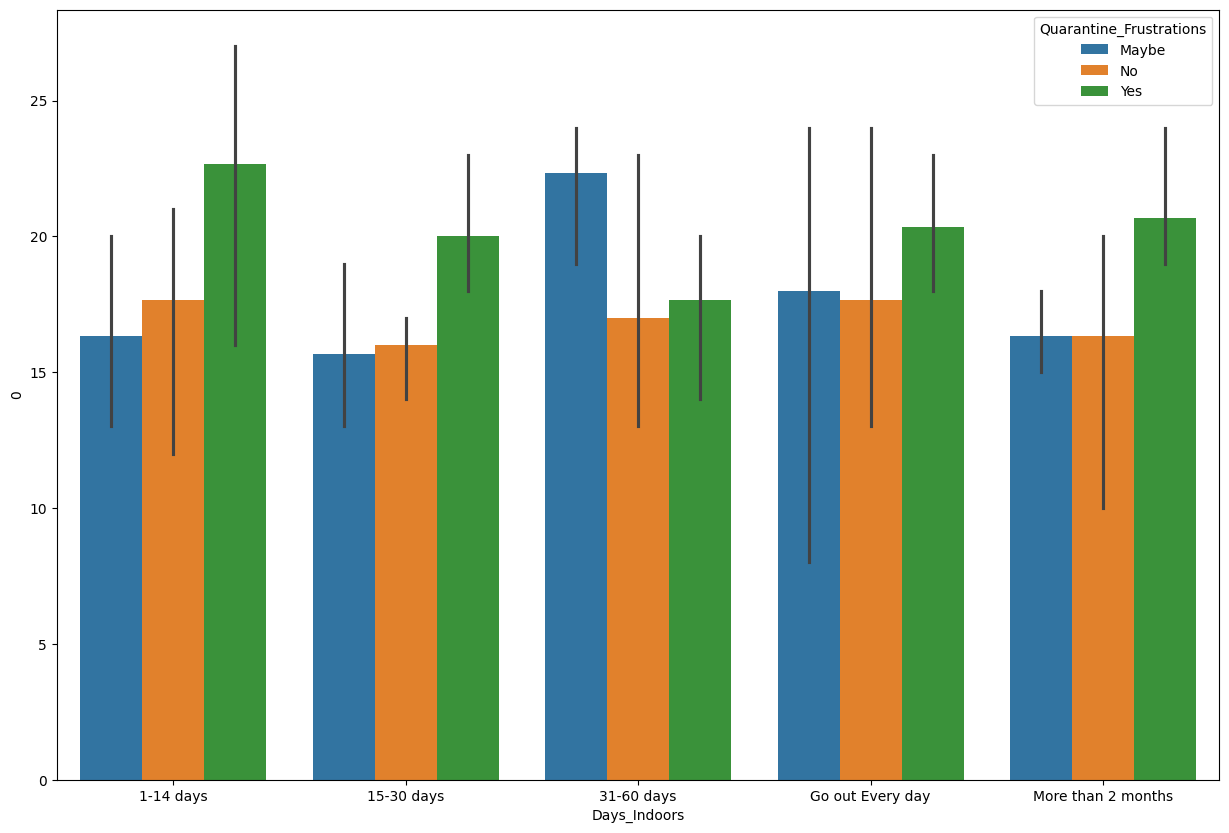

In [81]:
### 11) How does the duration of time spent indoors affect quarantine frustrations and changes in habits:-
df
plt.figure(figsize = (15,10))
sns.barplot(data = df,x = "Days_Indoors",y = 0, hue = "Quarantine_Frustrations")

<Axes: xlabel='Days_Indoors', ylabel='0'>

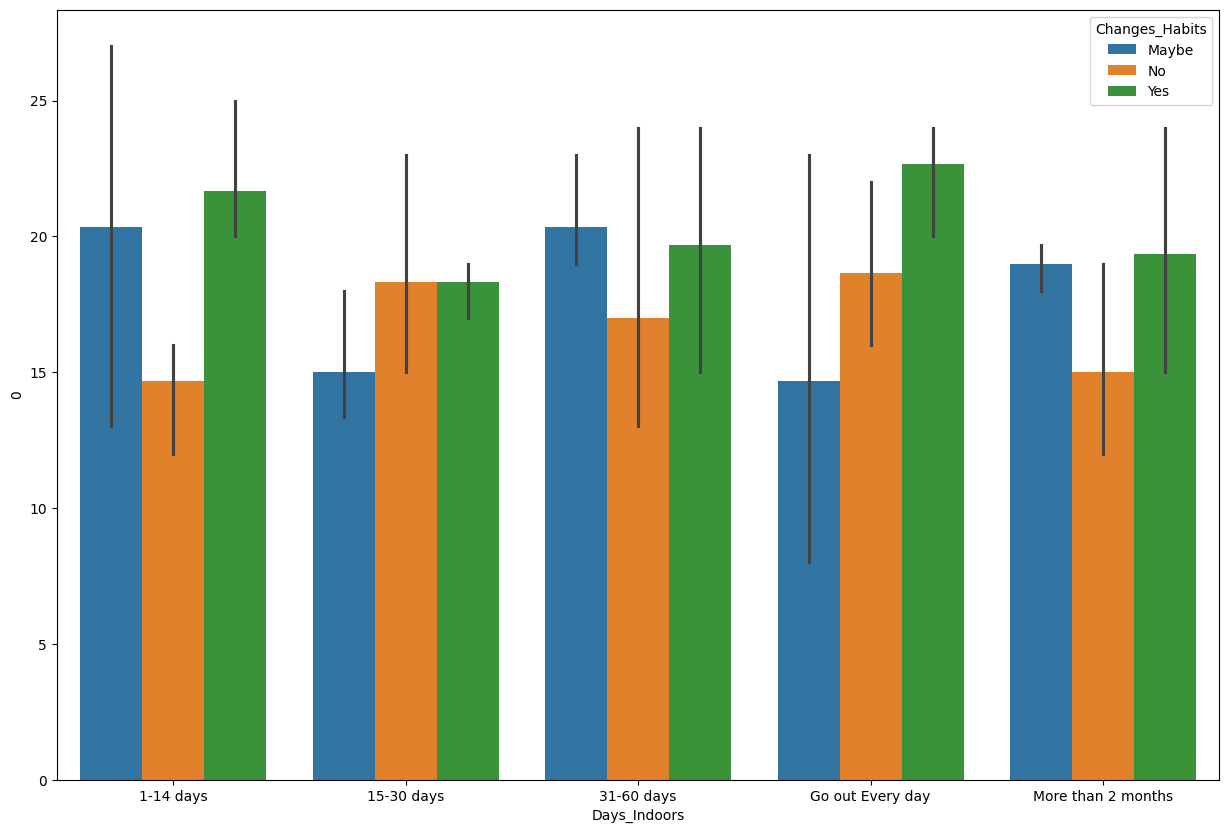

In [84]:
### 11) How does the duration of time spent indoors affect quarantine frustrations and changes in habits:-
df
plt.figure(figsize = (15,10))
sns.barplot(data = df, x = "Days_Indoors", y = 0, hue = "Changes_Habits")

#### 12) What factors contribute most to growing stress during Quarantine:-

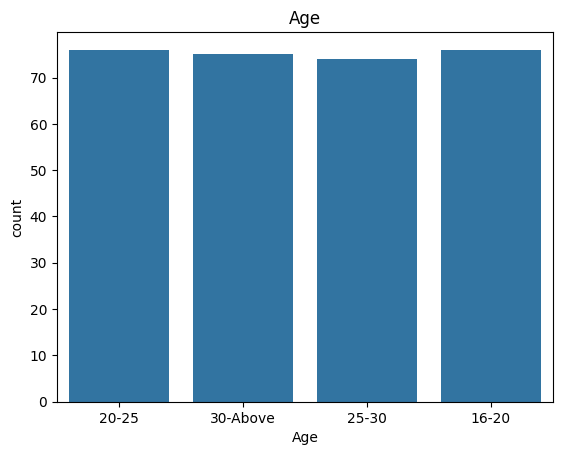

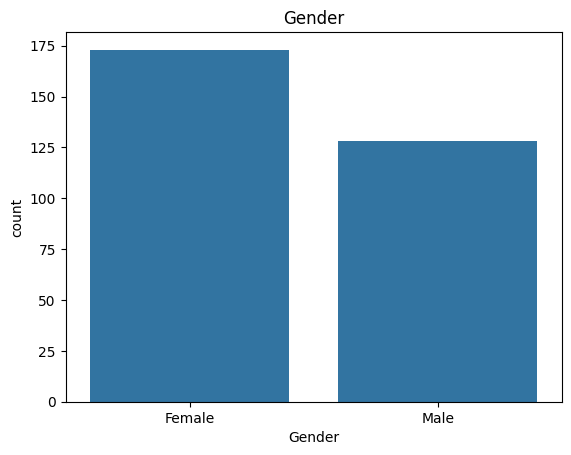

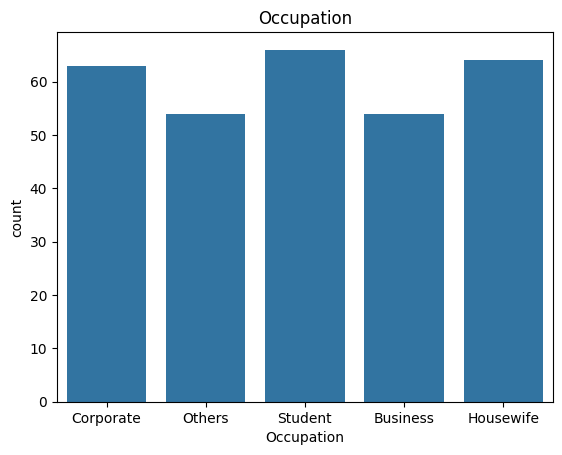

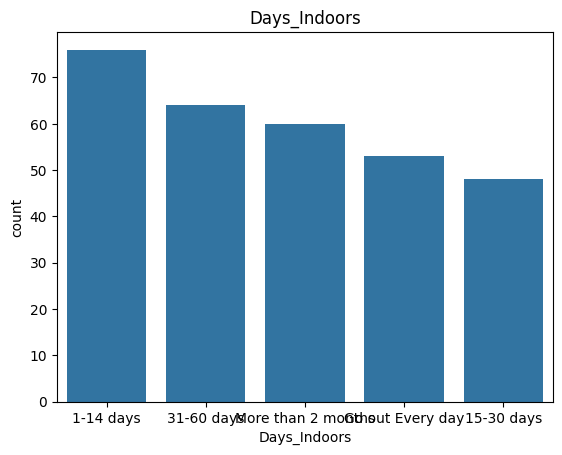

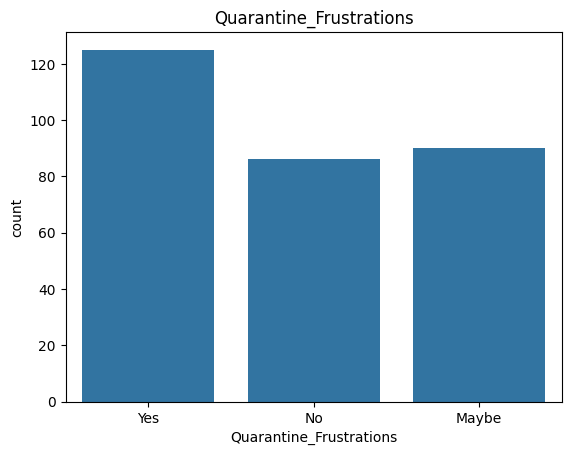

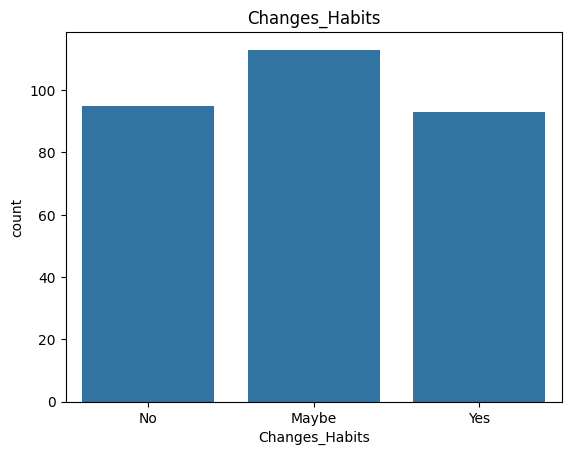

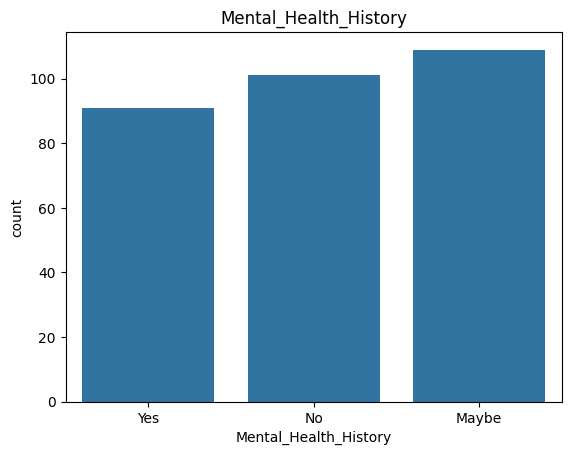

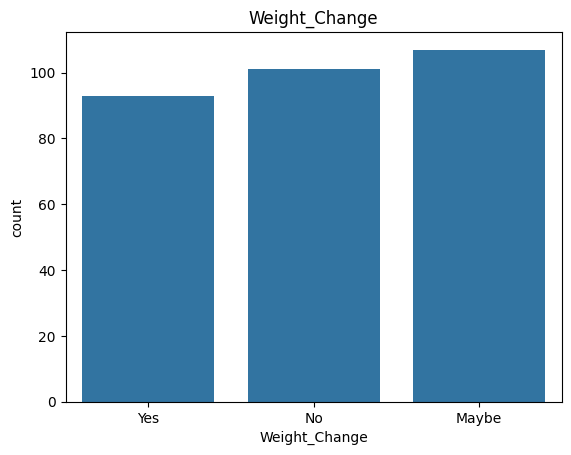

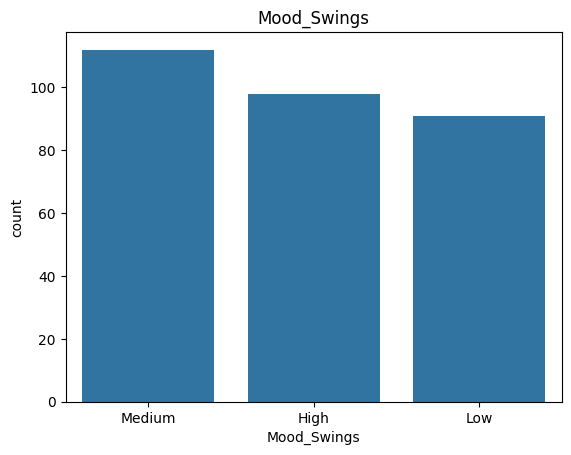

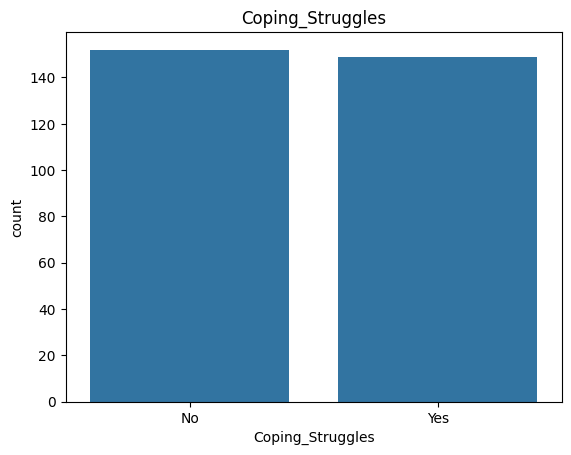

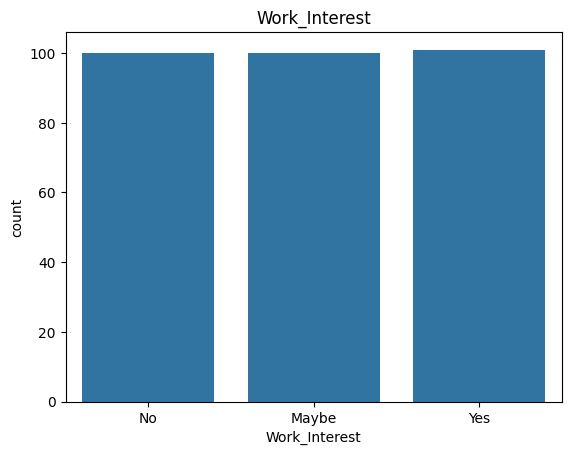

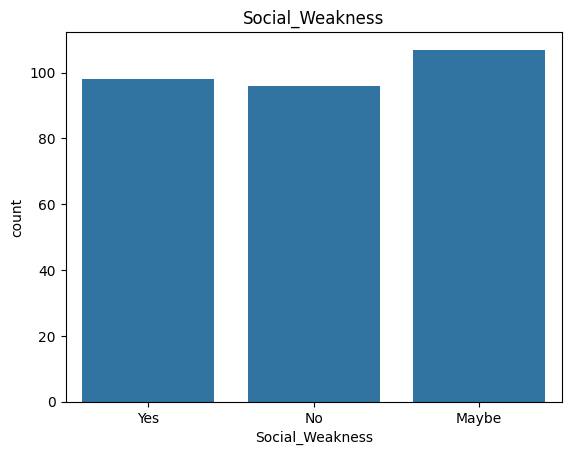

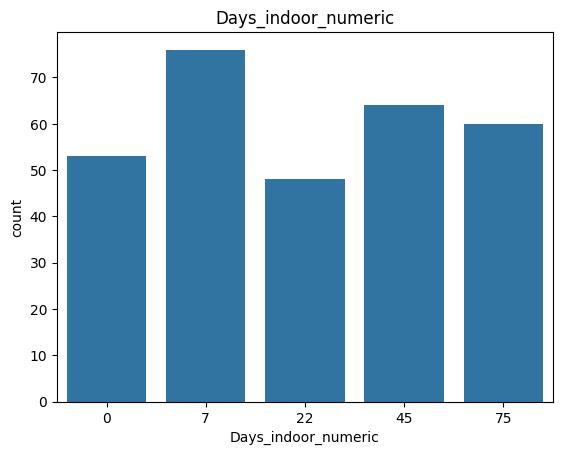

In [71]:
test_data
for i in test_data.loc[test_data["Growing_Stress"] == "Yes"].columns:
    if i != "Growing_Stress":
        plt.figure()
        sns.countplot(data = test_data.loc[test_data["Growing_Stress"] == "Yes"], x = i)
        plt.title(i)
        plt.show()

#### Observations :
- We can conclude from the above DataFrame Analysis that factors contribute most to growing stress during Quarantine are :
- Days Indoors
- Gender
- Days_indoor_numeric
- Mood Swings
- Quarantine Frustrations